In [36]:
import pandas as pd
pd.__version__

'2.3.2'

- Pandas
    - Panel datas (dados em painel)
    - Manipulação e análise de dados em Python;
    - Torna mais fácil manipulação de diferentes formatos de arquivo (ex: csv);
    - Dataframe

- Listas vs. DataFrame
    - Criar a partir de uma lista e adicionar o nome das colunas
    - Criar a partir de um dicionário
    - Criar a partir já com os atributos

In [37]:
lista = [[1,2], [3,4], [5,6]]
print(lista)
display(lista)

for row in lista:
    print(row)

[[1, 2], [3, 4], [5, 6]]


[[1, 2], [3, 4], [5, 6]]

[1, 2]
[3, 4]
[5, 6]


In [38]:
range(3)

range(0, 3)

In [39]:
df = pd.DataFrame(index=[4,9,'goiaba'], data=lista, columns=['col1', 'col2'])
display(df)


,col1,col2
4,1,2
9,3,4
goiaba,5,6


In [40]:
df.columns = ['A','B']
df

,A,B
4,1,2
9,3,4
goiaba,5,6


- loc vs iloc
    - loc no qual retorna a linha de acordo com o rótulo dado
    - iloc[]: faz a busca de acordo com localização no DataFrame
    

In [41]:
df.iloc[0]

A    1
B    2
Name: 4, dtype: int64

In [42]:
df.loc['goiaba',:]

A    5
B    6
Name: goiaba, dtype: int64

## Leitura de arquivos (csv, json, parquet, pickle, excel...)

In [43]:
csv_url = "https://dados.fortaleza.ce.gov.br/dataset/10dbe7db-bed1-40d4-88b7-90c016adbe4f/resource/294e2c10-a383-4434-a69f-b4cca2a3ee62/download/dadosabertos_viagensbicicletar_2025.csv"
data = pd.read_csv(csv_url)
data.columns

Index(['MeioRetirada', 'IdUsuario', 'Sexo', 'DataViagem', 'HoraRetirada',
       'EstacaoRetirada', 'HoraDevolucao', 'EstacaoDevolucao', 'DuracaoViagem',
       'TipoEstacao', 'TipoBicicleta', 'AnoViagem'],
      dtype='object')

In [44]:
data.head()

,MeioRetirada,IdUsuario,Sexo,DataViagem,HoraRetirada,EstacaoRetirada,HoraDevolucao,EstacaoDevolucao,DuracaoViagem,TipoEstacao,TipoBicicleta,AnoViagem
0,APP-BU,6391140,F,2025-01-02,16:40:37,72,17:33:06,72,53,Bicicletar,Convencional,2025
1,APP-BU,3476985,M,2025-01-02,21:12:21,85,21:26:29,92,14,Bicicletar,Convencional,2025
2,APP-BU,5733685,F,2025-01-02,17:36:13,72,18:34:37,83,58,Bicicletar,Convencional,2025
3,APP-BU,5498706,F,2025-01-02,21:00:11,83,21:05:41,85,5,Bicicletar,Convencional,2025
4,APP-BU,7388932,-,2025-01-03,12:12:53,92,15:41:25,91,209,Bicicletar,Convencional,2025


In [45]:
help(data.groupby(by="Sexo").agg)

Help on method aggregate in module pandas.core.groupby.generic:

aggregate(func=None, *args, engine=None, engine_kwargs=None, **kwargs) method of pandas.core.groupby.generic.DataFrameGroupBy instance
    Aggregate using one or more operations over the specified axis.

    Parameters
    ----------
    func : function, str, list, dict or None
        Function to use for aggregating the data. If a function, must either
        work when passed a DataFrame or when passed to DataFrame.apply.

        Accepted combinations are:

        - function
        - string function name
        - list of functions and/or function names, e.g. ``[np.sum, 'mean']``
        - dict of axis labels -> functions, function names or list of such.
        - None, in which case ``**kwargs`` are used with Named Aggregation. Here the
          output has one column for each element in ``**kwargs``. The name of the
          column is keyword, whereas the value determines the aggregation used to compute
          

In [46]:
data.groupby(by="Sexo")['DuracaoViagem'].agg(["mean", "max"])

,mean,max
Sexo,,
-,28.018823,250
F,26.659654,250
M,23.287001,250
O,24.363409,193
o,69.000000,69


In [47]:
data.groupby(by='DataViagem')

In [48]:
data.head

<bound method NDFrame.head of        MeioRetirada  IdUsuario Sexo  DataViagem HoraRetirada  EstacaoRetirada  \
0            APP-BU    6391140    F  2025-01-02     16:40:37               72   
1            APP-BU    3476985    M  2025-01-02     21:12:21               85   
2            APP-BU    5733685    F  2025-01-02     17:36:13               72   
3            APP-BU    5498706    F  2025-01-02     21:00:11               83   
4            APP-BU    7388932    -  2025-01-03     12:12:53               92   
...             ...        ...  ...         ...          ...              ...   
720433       APP-BU    8313723    -  2025-07-17     07:48:01              245   
720434       APP-BU    4797591    F  2025-07-20     10:41:31               27   
720435          APP    6582087    M  2025-07-20     11:22:44               15   
720436       APP-BU    7034444    -  2025-07-16     19:08:24              208   
720437       APP-BU    1935751    F  2025-07-17     09:49:09              102  

- Colunas: Podemos fazer manipulação nas colunas das seguintes formas:
    - Simplesmente digitando o nome da coluna entre colchetes;
    - iloc[]: utilizando a função iloc e usando dois argumentos [ arg1, arg2 ]:
        - arg1) dois-pontos: para trazer todas as linhas
        - arg2) o index da coluna


In [49]:
data.dtypes

MeioRetirada        object
IdUsuario            int64
Sexo                object
DataViagem          object
HoraRetirada        object
EstacaoRetirada      int64
HoraDevolucao       object
EstacaoDevolucao     int64
DuracaoViagem        int64
TipoEstacao         object
TipoBicicleta       object
AnoViagem            int64
dtype: object

In [50]:
pd.to_datetime(data.DataViagem)

0        2025-01-02
1        2025-01-02
2        2025-01-02
3        2025-01-02
4        2025-01-03
            ...    
720433   2025-07-17
720434   2025-07-20
720435   2025-07-20
720436   2025-07-16
720437   2025-07-17
Name: DataViagem, Length: 720438, dtype: datetime64[ns]

In [51]:
data.describe()[data.describe().columns[1:]]

,EstacaoRetirada,EstacaoDevolucao,DuracaoViagem,AnoViagem
count,720438.000000,720438.000000,720438.000000,720438.0
mean,105.666517,107.411194,25.646294,2025.0
std,89.289219,89.730133,24.030452,0.0
min,1.000000,1.000000,3.000000,2025.0
25%,29.000000,32.000000,9.000000,2025.0
50%,91.000000,93.000000,18.000000,2025.0
75%,163.000000,165.000000,35.000000,2025.0
max,517.000000,904.000000,250.000000,2025.0


In [52]:
pd.Series([1,2,4,4],index=[10,9,8,7])

10    1
9     2
8     4
7     4
dtype: int64

In [53]:
data['MeioRetirada']

0         APP-BU
1         APP-BU
2         APP-BU
3         APP-BU
4         APP-BU
           ...  
720433    APP-BU
720434    APP-BU
720435       APP
720436    APP-BU
720437    APP-BU
Name: MeioRetirada, Length: 720438, dtype: object

In [54]:
data[['MeioRetirada', 'EstacaoRetirada']]

,MeioRetirada,EstacaoRetirada
0,APP-BU,72
1,APP-BU,85
2,APP-BU,72
3,APP-BU,83
4,APP-BU,92
...,...,...
720433,APP-BU,245
720434,APP-BU,27
720435,APP,15
720436,APP-BU,208


- Adicionar linhas
    - loc e iloc: adiciona uma linha no local
    - Adicionar colunas: basta colocar o no



- Na primeira parte da análise, o mais importante é:
    - Entender o significado das colunas
    - Identificar seus tipos
    - computar algumas estatísticas básicas
    - procurar por inconsistências dentro de uma mesma coluna

In [55]:
data['MeioRetirada'].unique()
display(data.columns)

Index(['MeioRetirada', 'IdUsuario', 'Sexo', 'DataViagem', 'HoraRetirada',
       'EstacaoRetirada', 'HoraDevolucao', 'EstacaoDevolucao', 'DuracaoViagem',
       'TipoEstacao', 'TipoBicicleta', 'AnoViagem'],
      dtype='object')

<Axes: xlabel='Sexo'>

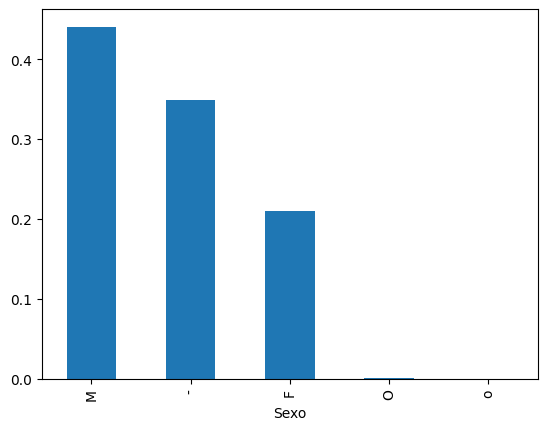

In [56]:
data['Sexo'].value_counts(normalize=True).plot(kind='bar')

In [57]:
data.isna()

,MeioRetirada,IdUsuario,Sexo,DataViagem,HoraRetirada,EstacaoRetirada,HoraDevolucao,EstacaoDevolucao,DuracaoViagem,TipoEstacao,TipoBicicleta,AnoViagem
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
720433,False,False,False,False,False,False,False,False,False,False,False,False
720434,False,False,False,False,False,False,False,False,False,False,False,False
720435,False,False,False,False,False,False,False,False,False,False,False,False
720436,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
20286/data.shape[0]*100

2.8157870628700876

In [59]:
data.isna().sum()

MeioRetirada            0
IdUsuario               0
Sexo                    0
DataViagem              0
HoraRetirada            0
EstacaoRetirada         0
HoraDevolucao           0
EstacaoDevolucao        0
DuracaoViagem           0
TipoEstacao             0
TipoBicicleta       20286
AnoViagem               0
dtype: int64

In [60]:
data.TipoBicicleta.value_counts()

TipoBicicleta
Convencional    650469
Eletrica         40201
Mini              9482
Name: count, dtype: int64

In [61]:
data['Sexo']=='F'

0          True
1         False
2          True
3          True
4         False
          ...  
720433    False
720434     True
720435    False
720436    False
720437     True
Name: Sexo, Length: 720438, dtype: bool

In [62]:
a = data[data['Sexo']=='M']

In [63]:
M = data[data['Sexo']=='M'].copy()
F = data[data['Sexo']=='F'].copy()

In [64]:
F.shape

(151208, 12)

In [65]:
(data['Sexo']!='M') & (data['TipoBicicleta']=='Eletrica')

0         False
1         False
2         False
3         False
4         False
          ...  
720433    False
720434    False
720435    False
720436    False
720437    False
Length: 720438, dtype: bool

In [66]:
data[(data['Sexo']=='M') & 
    (data['TipoBicicleta']=='Eletrica')
    ]

,MeioRetirada,IdUsuario,Sexo,DataViagem,HoraRetirada,EstacaoRetirada,HoraDevolucao,EstacaoDevolucao,DuracaoViagem,TipoEstacao,TipoBicicleta,AnoViagem
19,APP-BU,5734325,M,2025-01-02,17:55:00,24,18:40:33,174,45,Bicicletar,Eletrica,2025
22,APP-BU,6381630,M,2025-01-01,17:42:28,89,18:23:55,55,41,Bicicletar,Eletrica,2025
24,APP-BU,6208759,M,2025-01-05,20:13:22,210,20:27:51,95,14,Bicicletar,Eletrica,2025
27,BU,5171406,M,2025-01-01,17:06:51,92,17:35:28,89,29,Bicicletar,Eletrica,2025
227,APP-BU,2806530,M,2025-01-02,07:57:04,12,08:12:36,28,15,Bicicletar,Eletrica,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
720122,APP-BU,6250768,M,2025-07-16,18:23:07,9,19:17:09,9,54,Bicicletar,Eletrica,2025
720123,APP-BU,7405330,M,2025-07-17,05:50:04,79,06:03:47,97,13,Bicicletar,Eletrica,2025
720126,APP-BU,6250768,M,2025-07-16,21:18:31,8,22:12:35,80,54,Bicicletar,Eletrica,2025
720129,APP-BU,7542590,M,2025-07-16,22:31:11,80,22:35:44,97,4,Bicicletar,Eletrica,2025


In [67]:
data[data['EstacaoRetirada'].isin([87, 93, 209, 13])]

,MeioRetirada,IdUsuario,Sexo,DataViagem,HoraRetirada,EstacaoRetirada,HoraDevolucao,EstacaoDevolucao,DuracaoViagem,TipoEstacao,TipoBicicleta,AnoViagem
6,APP-BU,7374994,-,2025-01-03,16:58:12,93,17:37:41,86,39,Bicicletar,Convencional,2025
8,BU,4104258,F,2025-01-04,08:58:36,87,09:24:04,92,26,Bicicletar,Convencional,2025
14,BU,7503376,-,2025-01-02,17:10:50,93,17:36:52,93,26,Bicicletar,Convencional,2025
57,APP,6951478,F,2025-01-03,06:40:32,13,06:54:54,221,14,Bicicletar,Convencional,2025
83,BU,5185247,M,2025-01-05,07:35:31,93,07:52:52,100,17,Bicicletar,Convencional,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
720410,APP-BU,7688077,-,2025-07-19,20:39:20,13,09:15:06,14,30,Bicicletar,Convencional,2025
720415,APP,7655610,-,2025-07-19,19:38:29,13,20:31:34,13,53,Bicicletar,Convencional,2025
720420,BU,6853110,F,2025-07-20,12:02:29,13,12:24:10,15,22,Bicicletar,Convencional,2025
720424,APP-BU,4036874,F,2025-07-16,17:10:34,209,17:57:17,248,47,Bicicletar,Convencional,2025


In [68]:
data[data['DuracaoViagem'].between(20,50)]

,MeioRetirada,IdUsuario,Sexo,DataViagem,HoraRetirada,EstacaoRetirada,HoraDevolucao,EstacaoDevolucao,DuracaoViagem,TipoEstacao,TipoBicicleta,AnoViagem
6,APP-BU,7374994,-,2025-01-03,16:58:12,93,17:37:41,86,39,Bicicletar,Convencional,2025
7,BU,6373263,F,2025-01-03,20:12:32,86,20:37:08,87,25,Bicicletar,Convencional,2025
8,BU,4104258,F,2025-01-04,08:58:36,87,09:24:04,92,26,Bicicletar,Convencional,2025
10,APP-BU,6879860,F,2025-01-01,12:11:31,245,12:39:48,245,28,Bicicletar,Convencional,2025
13,BU,7533940,F,2025-01-02,06:28:56,246,06:55:17,93,27,Bicicletar,Convencional,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
720422,APP,4982702,M,2025-07-20,16:46:30,203,17:29:47,15,43,Bicicletar,Convencional,2025
720424,APP-BU,4036874,F,2025-07-16,17:10:34,209,17:57:17,248,47,Bicicletar,Convencional,2025
720426,APP,7647538,-,2025-07-17,17:23:21,41,17:54:17,227,31,Bicicletar,Convencional,2025
720429,APP,7998728,-,2025-07-20,20:47:02,13,21:32:43,14,45,Bicicletar,Convencional,2025


In [69]:
M

,MeioRetirada,IdUsuario,Sexo,DataViagem,HoraRetirada,EstacaoRetirada,HoraDevolucao,EstacaoDevolucao,DuracaoViagem,TipoEstacao,TipoBicicleta,AnoViagem
1,APP-BU,3476985,M,2025-01-02,21:12:21,85,21:26:29,92,14,Bicicletar,Convencional,2025
11,APP-BU,7580425,M,2025-01-01,19:09:06,201,19:16:49,246,7,Bicicletar,Convencional,2025
12,APP-BU,5448885,M,2025-01-01,17:19:43,240,17:36:51,201,17,Bicicletar,Convencional,2025
16,BU,7408115,M,2025-01-02,14:44:59,19,15:37:18,184,53,Bicicletar,Convencional,2025
19,APP-BU,5734325,M,2025-01-02,17:55:00,24,18:40:33,174,45,Bicicletar,Eletrica,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
720422,APP,4982702,M,2025-07-20,16:46:30,203,17:29:47,15,43,Bicicletar,Convencional,2025
720423,APP-BU,4754655,M,2025-07-18,07:43:38,227,07:56:37,244,13,Bicicletar,Convencional,2025
720428,APP-BU,5452467,M,2025-07-20,23:02:36,14,23:16:37,15,14,Bicicletar,Convencional,2025
720432,APP,5702057,M,2025-07-20,18:56:14,15,20:02:03,15,66,Bicicletar,Convencional,2025


In [74]:
# data[data[]]